<a href="https://colab.research.google.com/github/KOYAMA-Yuya/numerical_analysis/blob/main/2_sinc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sin波の予測

## 準備

###インポート

numpyとmatplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###x軸の生成

In [ ]:
x = np.linspace(-np.pi, np.pi, 50).reshape(-1,1)

In [ ]:
print(x)

[[-3.14159265]
 [-3.01336438]
 [-2.88513611]
 [-2.75690784]
 [-2.62867957]
 [-2.5004513 ]
 [-2.37222302]
 [-2.24399475]
 [-2.11576648]
 [-1.98753821]
 [-1.85930994]
 [-1.73108167]
 [-1.60285339]
 [-1.47462512]
 [-1.34639685]
 [-1.21816858]
 [-1.08994031]
 [-0.96171204]
 [-0.83348377]
 [-0.70525549]
 [-0.57702722]
 [-0.44879895]
 [-0.32057068]
 [-0.19234241]
 [-0.06411414]
 [ 0.06411414]
 [ 0.19234241]
 [ 0.32057068]
 [ 0.44879895]
 [ 0.57702722]
 [ 0.70525549]
 [ 0.83348377]
 [ 0.96171204]
 [ 1.08994031]
 [ 1.21816858]
 [ 1.34639685]
 [ 1.47462512]
 [ 1.60285339]
 [ 1.73108167]
 [ 1.85930994]
 [ 1.98753821]
 [ 2.11576648]
 [ 2.24399475]
 [ 2.37222302]
 [ 2.5004513 ]
 [ 2.62867957]
 [ 2.75690784]
 [ 2.88513611]
 [ 3.01336438]
 [ 3.14159265]]


### sin波を作成

In [ ]:
t = np.sin(x)

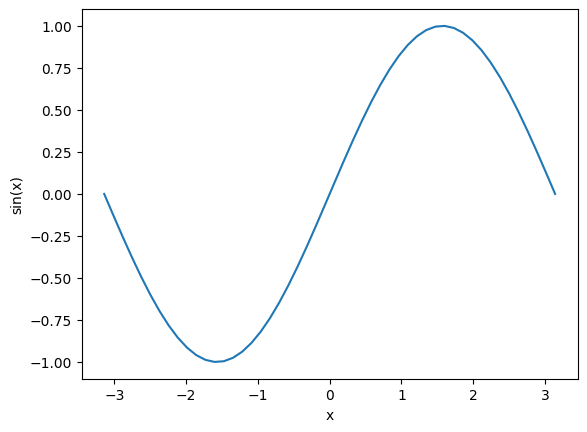

In [ ]:
plt.plot(x,t)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

## 学習

###追加のパッケージインポート

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

### 学習時のパラメータを設定

In [ ]:
batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

###モデルを生成

In [ ]:
model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation="sigmoid"))
model.add(Dense(n_out, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                40        
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


###モデルの学習



In [ ]:
history = model.fit(x, t, batch_size=batch_size, epochs=2000, validation_split=0.1)

Epoch 1/2000
6/6 [==============================] - 1s 52ms/step - loss: 0.7473 - val_loss: 0.0779
Epoch 2/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.6129 - val_loss: 0.0933
Epoch 3/2000
6/6 [==============================] - 0s 15ms/step - loss: 0.5513 - val_loss: 0.0875
Epoch 4/2000
6/6 [==============================] - 0s 11ms/step - loss: 0.5032 - val_loss: 0.0717
Epoch 5/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.4618 - val_loss: 0.0590
Epoch 6/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.4291 - val_loss: 0.0355
Epoch 7/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.3948 - val_loss: 0.0341
Epoch 8/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.3715 - val_loss: 0.0380
Epoch 9/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.3419 - val_loss: 0.0438
Epoch 10/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.3222 - val_loss: 0.0541
Epoch 11/2

###学習時の誤差を取得

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

###学習推移の可視化

先ほど取得した学習時の誤差をプロットする．

複数の要素を使うので凡例もつける．

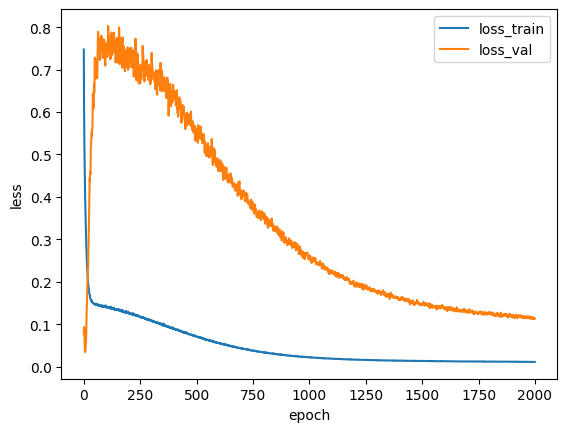

In [ ]:
plt.plot(np.arange(len(loss_train)), loss_train, label="loss_train")
plt.plot(np.arange(len(loss_val)), loss_val, label="loss_val")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('less')
plt.show()

##結果の可視化


###予測結果と正解の比較

2/2 [==============================] - 0s 6ms/step


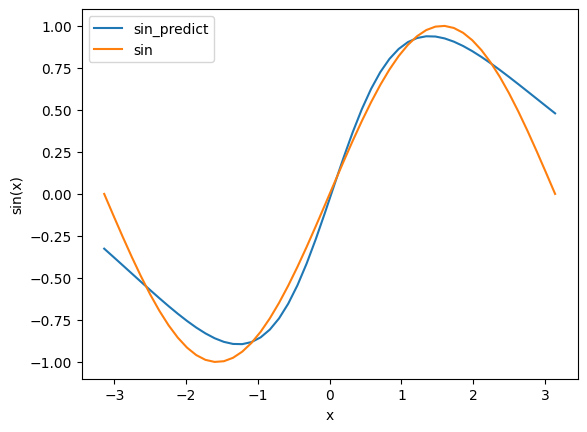

In [ ]:
plt.plot(x, model.predict(x), label="sin_predict")
plt.plot(x,t,label="sin")
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

#テキストセルについて補足

##改行について

改行するには二回改行する．
これだと改行しない．

これで改行する．